<a href="https://colab.research.google.com/github/omicsEye/PUBH6859/blob/main/assignment5_Ulises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading of data


1.   If the data is in Google Drive, just specify the path in the ***google.colab import***
2.   If the data is in local drive, skip the first ***google.colab import*** specify the path of the file in the ***pd.read_csv function***



In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
metabolite = pd.read_csv("/content/drive/My Drive/omicsEye/PUBH6859/metabolites.txt", sep="\t",header = None)
metabolite.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592
0,NaN,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
1,31593.0,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.92545,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.95428,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.33838,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.17372,0.255931,1.564567,2.776705,0.885554,0.024495,1.84977,47.868225,6.558881,0.492449,0.472759,4.286731,0.72338,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
2,31595.0,0.778072,0.854428,1.052241,1.809722,1.124312,1.03585,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.33384,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.91191,1.083882,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.18982,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
3,31597.0,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,6.505247,0.66481,...,1.679782,1.213876,1.20355,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1,0.027885,3.67949,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
4,31599.0,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.88544,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.19182,2.222435,0.554168,1.35426

In [4]:
info = pd.read_csv("/content/drive/My Drive/omicsEye/PUBH6859/sample_info.txt", sep="\t", header=None)
info.head()

,0,1,2,3,4,5,6
0,NaN,Group,Time,Aorta_Portal,Position,Position2,Animal
1,31592.0,1_RYGB,Week 1,A,C,P3,RYGB 7
2,31593.0,1_RYGB,Week 1,P,C,P4,RYGB 7
3,31594.0,1_RYGB,Week 1,A,C,P5,RYGB 8
4,31595.0,1_RYGB,Week 1,P,C,P6,RYGB 8


# Data cleaning & Data preparation

1.   The data is transposed to fit the desired format
2.   the NaN(Not a Number) values are taken care here by droping them, from the data itself.

1.   The datasets are merged to form the complete dataset that is required for the study.

1.   Missing row names are added and some missing values which are not NaN are also taken care of

















In [5]:
info.columns = info.iloc[0]
info = info.drop(info.index[0])
info = info.rename(columns=str).rename(columns={'nan':'Sample_ID'})
info = info.loc[:,["Sample_ID","Group","Time"]]
info

,Sample_ID,Group,Time
1,31592.0,1_RYGB,Week 1
2,31593.0,1_RYGB,Week 1
3,31594.0,1_RYGB,Week 1
4,31595.0,1_RYGB,Week 1
5,31596.0,1_RYGB,Week 1
...,...,...,...
96,31687.0,4_Weight Matched,Month 3
97,31688.0,4_Weight Matched,Month 3
98,31689.0,4_Weight Matched,Month 3
99,31690.0,4_Weight Matched,Month 3


In [6]:
metabolite.columns = metabolite.iloc[0]
metabolite = metabolite.drop(metabolite.index[0])
metabolite = metabolite.rename(columns=str).rename(columns={'nan':'Sample_ID'})
metabolite = metabolite.dropna(axis =1)
metabolite.head()

,Sample_ID,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
1,31593.0,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.92545,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.95428,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.33838,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.17372,0.255931,1.564567,2.776705,0.885554,0.024495,1.84977,47.868225,6.558881,0.492449,0.472759,4.286731,0.72338,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
2,31595.0,0.778072,0.854428,1.052241,1.809722,1.124312,1.03585,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.33384,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.91191,1.083882,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.18982,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
3,31597.0,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,6.505247,0.66481,...,1.679782,1.213876,1.20355,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1,0.027885,3.67949,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
4,31599.0,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.88544,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.19182,2.222435,0.554168,1.354266,10.42614,5.208524,1.98782,1.295995,2.671886,2.779001,1.199335,33.009239,2.161645,1.195299,3.072445,1.546912,...,1.710967,1.19374,1.206329,2.927879,1.529254,0.584887,1.435459,0.213593,1.938642,1.424512,0.417923,2.552179,7.184206,0.255931,1.292334,3.324645,1.354726,0.02

Convert values from object to float types

In [7]:
# metabolite.describe()
for col in metabolite.columns:
  metabolite[col] = metabolite[col].astype(float)

metabolite.dtypes

0
Sample_ID                        float64
glycine                          float64
N-acetylglycine                  float64
sarcosine                        float64
dimethylglycine                  float64
                                  ...   
O-sulfo-L-tyrosine               float64
2-oxo-1-pyrrolidinepropionate    float64
6-hydroxyindole sulfate          float64
thioproline                      float64
6-acetylglucose                  float64
Length: 593, dtype: object

## Merging datasets

In [8]:
df_join = pd.merge(info, metabolite, on=['Sample_ID'])
df_join.head()


,Sample_ID,Group,Time,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
0,31593.0,1_RYGB,Week 1,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.925450,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.954280,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.338380,1.040741,30.724224,2.016838,1.041511,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.173720,0.255931,1.564567,2.776705,0.885554,0.024495,1.849770,47.868225,6.558881,0.492449,0.472759,4.286731,0.723380,1.0,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
1,31595.0,1_RYGB,Week 1,0.778072,0.854428,1.052241,1.809722,1.124312,1.035850,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.333840,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.189820,0.492449,0.472759,0.607359,1.354777,1.0,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
2,31597.0,1_RYGB,Week 1,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,...,1.679782,1.213876,1.203550,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1.0,0.027885,3.679490,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
3,31599.0,1_RYGB,Week 1,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.885440,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.191820,2.222435,0.554168,1.354266,10.426140,5.208524,1.987820,1.295995,2.671886,2.779001,1.199335,33.009239,2.161645,1.195299,...,1.710967,1.193740,1.206329,2.927879,1.529254,0.584887,1.435459,0.213593,1.938642,1.424512,0.417923,2.552179,7.184206,0.255931,1.292334,3.324645,1.354726,0.024495,2.1

# Exploratory analyses

In [9]:
df_join.describe(include=[np.number])

,Sample_ID,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,31642.000000,1.057275,1.073585,0.988041,1.341889,0.996806,1.035911,1.514784,1.026711,1.173415,1.003860,1.264362,1.143275,1.299471,0.971254,1.072800,1.132172,1.213641,1.020226,2.067680,1.550192,1.044138,1.211622,1.303660,4.452663,1.183385,1.145274,1.017219,2.388260,1.430871,1.080389,1.036943,1.208342,1.367448,1.477690,5.823902,0.986051,1.092588,1.220206,1.022836,...,1.031198,1.004782,1.026056,1.397955,1.035363,0.975675,1.243585,1.433689,0.643300,0.601722,1.143500,1.065239,1.350167,0.891694,1.482511,4.782245,1.335313,0.089529,4.260928,11.032608,2.265130,0.880505,1.140138,1.368122,1.044844,1.0,0.092693,1.704486,0.497186,1.285072,8.888190,1.051461,0.823434,1.008169,1.240041,1.441114,1.927045,4.386340,1.232458,1.340169
std,36.667189,0.253118,0.375993,0.421231,0.867697,0.135856,0.198945,1.248292,0.354041,0.616039,0.258844,0.941462,0.794144,0.851622,0.189825,0.509257,0.689234,0.728676,0.241877,2.449720,2.698637,0.372177,0.896793,1.017705,8.046135,0.862287,0.991268,0.164976,2.883732,1.170641,0.643772,0.613584,0.703884,0.934668,1.330747,10.361897,0.538125,0.605983,1.400195,0.516249,...,0.387291,0.350429,0.288363,1.084276,0.710496,1.044939,0.984465,3.631683,0.600291,0.485271,1.194849,0.627436,1.527190,0.352094,1.324207,15.061886,0.853066,0.356204,17.348199,29.654288,3.088181,0.492748,0.797690,1.089234,0.658576,0.0,0.354966,1.846781,2.140103,1.134975,39.857860,0.344098,1.495244,0.285664,0.501063,1.293203,2.460554,16.532586,0.750292,1.012379
min,31593.000000,0.607936,0.301852,0.422501,0.579968,0.717534,0.692393,0.442021,0.478687,0.463134,0.598287,0.524793,0.325999,0.339317,0.556639,0.546892,0.306780,0.507089,0.594004,0.486715,0.267408,0.332038,0.277941,0.056365,0.232034,0.341404,0.149757,0.688007,0.570706,0.484762,0.250464,0.217087,0.354075,0.373562,0.028509,0.212168,0.252708,0.383820,0.521881,0.314679,...,0.172956,0.511754,0.576020,0.297722

## Correlations between metabolites

Pearson correlation between metabolites for each group is obtained by subseting the main data frame `df_join` inside a loop:

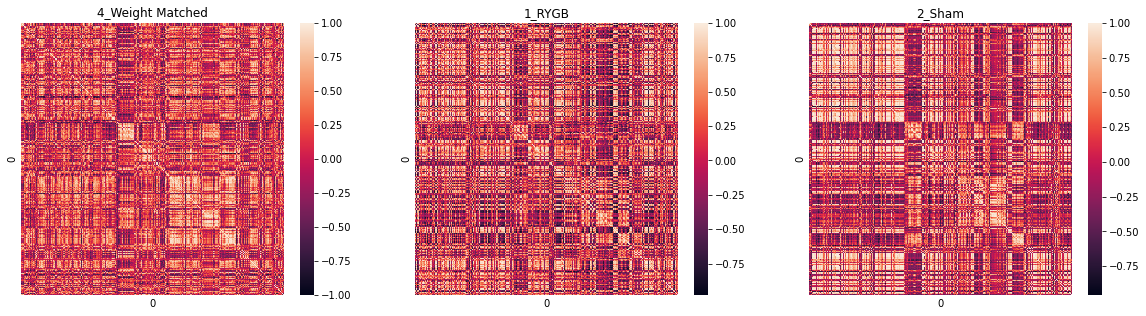

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

groups = list(set(df_join['Group']))
f,axes = plt.subplots( nrows=1, ncols= len(groups), figsize=(20, 5) )

for i in range(len(groups)):
  tmp_df = df_join.loc[ df_join['Group'] == groups[i] ]
  sns.heatmap(tmp_df.corr(), xticklabels=False, yticklabels=False, ax = axes[i])
  axes[i].title.set_text( groups[i] )

Each group seem to have their own pattern of correlation


# Prediction of group category by using metabolite profiles

Random forest classifier is used

## Data preparation

Since the column `Sample_ID` is not really adding a meaningfull information for the prediction, these columns are deleted. Furthermore, time is converted into numerical values

In [11]:
new_df = df_join.drop('Sample_ID',1)

new_df.loc[ new_df['Time'] == 'Week 1', 'Time'] = 1
new_df.loc[ new_df['Time'] == 'Month 3', 'Time'] = 12

new_df['Time'] = new_df['Time'].astype(int)
new_df.head()

,Group,Time,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
0,1_RYGB,1,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.925450,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.954280,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.338380,1.040741,30.724224,2.016838,1.041511,3.165958,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.173720,0.255931,1.564567,2.776705,0.885554,0.024495,1.849770,47.868225,6.558881,0.492449,0.472759,4.286731,0.723380,1.0,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
1,1_RYGB,1,0.778072,0.854428,1.052241,1.809722,1.124312,1.035850,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.333840,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.911910,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.189820,0.492449,0.472759,0.607359,1.354777,1.0,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
2,1_RYGB,1,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,6.505247,...,1.679782,1.213876,1.203550,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1.0,0.027885,3.679490,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
3,1_RYGB,1,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.885440,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.191820,2.222435,0.554168,1.354266,10.426140,5.208524,1.987820,1.295995,2.671886,2.779001,1.199335,33.009239,2.161645,1.195299,3.072445,...,1.710967,1.193740,1.206329,2.927879,1.529254,0.584887,1.435459,0.213593,1.938642,1.424512,0.417923,2.552179,7.184206,0.255931,1.292334,3.324645,1.354726,0.024495,2.133821,51

Stratified sampling in function of `Group` column and creation of both training and testing sets:

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.4, random_state = 42)

for train_index, test_index in split.split(new_df, new_df['Group'] ):
  strat_train_set = new_df.loc[train_index]
  strat_test_set  = new_df.loc[test_index]

# Testing sets
test_num = strat_test_set.drop('Group', axis=1)
test_labels = strat_test_set['Group']

# Training sets
train_num    = strat_train_set.drop('Group', axis=1)
train_labels = strat_train_set['Group']


strat_train_set['Group'].value_counts()/len( strat_train_set )

2_Sham              0.333333
1_RYGB              0.333333
4_Weight Matched    0.333333
Name: Group, dtype: float64

Since classifiers tends to be sensitive to high variance between features, values of columns are normalized with the `StandarScaler` function :

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

standarize      = StandardScaler()
train_instances = standarize.fit_transform( train_num ) # normalization of numeric values
test_instances  = standarize.fit_transform( test_num  )

## Prediction using Random Forest Classifier

In [14]:
from sklearn.model_selection import cross_val_predict, cross_val_score # cross validation
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(train_instances, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Probabilities for each group classification are obtained with `cross_val_predict` function. This function essentially make different random subset inside the main set and make prediction with the model. Probabilities obtained from these predictions are stored in numpy matrix where each colum represent a group.

In [15]:
probas_forest = cross_val_predict(forest_clf, train_instances, train_labels, cv = 3, method='predict_proba')

Then, this matrix is used to assess the quality of the Random Forest classification. In this example, the Receiver Operating Characteristic (ROC) curve is used:

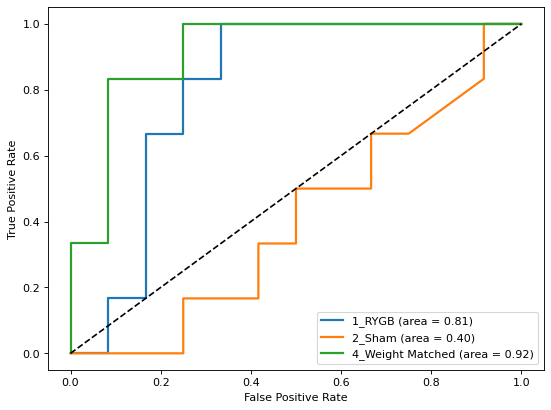

In [16]:
from sklearn.metrics import roc_curve, auc

# function to automatize roc curves
def plot_roc_curve(all_classes, labels, probas_forest):
  plt.figure(figsize=(8, 6), dpi=80)

  for i in range(len(all_classes)):
    # false postive rate & true postive rate
    fpr, tpr, _ = roc_curve( labels == all_classes[i],  probas_forest[:,i] ) 
    # area under the curve
    roc_auc = auc(fpr, tpr) 
    plt.plot( fpr, tpr, linewidth = 2, label = "%s (area = %.2f)" % (all_classes[i], roc_auc) )

  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")


plot_roc_curve(all_classes  = forest_clf.classes_, 
               labels       = train_labels, 
               probas_forest= probas_forest)

The model under classify the `2_Sham` group and it might be a consequence of the selection of parameters in the model (i.e., default parameters)

## Finding best hyperparameters by using Grid Search

Random Forest Classifier has a set of default parameters for creating a classifier. But, these paremeters can be modified in order to improve the model. Then, `GridSearchCV` function is used to iteratively assessing a range of previously defined parameters.


But, before using `GridSearchCV`, values from `train_labels` variable are changed from `str` type values into 2D dimmensional arrays as, unlike the `RandomForestClassifier` function, `GridSearchCV` does not accept `str` type values as labels

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
train_labels_encoded = cat_encoder.fit_transform(strat_train_set[['Group']])
train_labels_encoded.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
      {'n_estimators': [3, 50, 150, 200],
       'bootstrap'   : [False],
       'n_estimators': [3, 50, 100, 150, 200], 
       'max_features': [2,3,4],
       'min_samples_leaf': [1,2,4,6] 
       }
]

forest_clf_new = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV( forest_clf_new, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True )
grid_search.fit(train_instances, train_labels_encoded.toarray())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

Best set of hyperparameters can be accessed directly by using `grid_search.best_estimator_.get_params()` function. Then, these new set of parameters are used to make a new classifier:


In [19]:
forest_clf = RandomForestClassifier( **grid_search.best_estimator_.get_params() )
forest_clf.fit(train_instances, train_labels)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

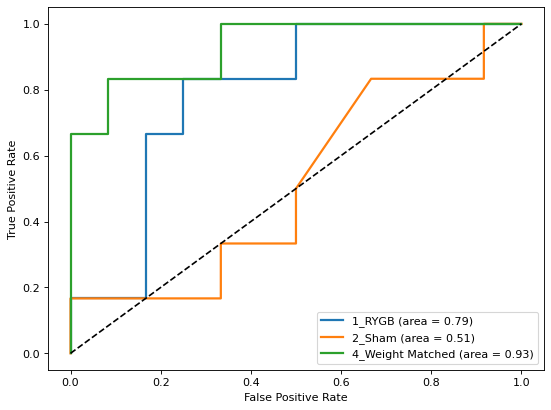

In [20]:
probas_forest = cross_val_predict(forest_clf, train_instances, train_labels, cv = 3, method='predict_proba')
plot_roc_curve(all_classes  = forest_clf.classes_, 
               labels       = train_labels, 
               probas_forest= probas_forest)

If we compare above plot with the previous one, we can notice a slight increase in auc (area under the curve) values for `2_Sham` group. Features generating this new classification can ranked by using the `forest_clf.feature_importances_` array:

In [21]:
features_names =  list(strat_train_set.columns)
features_importance = forest_clf.feature_importances_

# top twenty features explaining the new classification
sorted( zip( features_importance, features_names), reverse=True )[0:20]

[(0.02671826018808778, 'arachidonate (20:4n6)'),
 (0.02079125615763546, 'glutamate'),
 (0.019394805194805197, 'glycerophosphoglycerol'),
 (0.018733542319749216, 'campesterol'),
 (0.01801398601398601, 'pentadecanoylcarnitine (C15)*'),
 (0.017000000000000005, '1,2-dipalmitoyl-GPC (16:0/16:0)'),
 (0.016909090909090912, '1-myristoyl-2-arachidonoyl-GPC (14:0/20:4)*'),
 (0.015476936856247204, '5-methylthioadenosine (MTA)'),
 (0.014303423848878394, 'margaroylcarnitine (C17)*'),
 (0.014241379310344833, 'quinolinate'),
 (0.012122257053291539, '2-aminoheptanoate'),
 (0.011861952861952865, '2-oxoadipate'),
 (0.011600985221674876, 'carboxyethyl-GABA'),
 (0.011517575757575753, 'docosadienoate (22:2n6)'),
 (0.011368764568764572, '3-methyl-2-oxovalerate'),
 (0.011096812278630458, 'fumarate'),
 (0.010909090909090908, 'N-acetylalanine'),
 (0.010880952380952382, 'glucuronate'),
 (0.010735930735930736, '5-(galactosylhydroxy)-L-lysine'),
 (0.01036363636363637, 'sphingomyelin (d18:1/14:0, d16:1/16:0)*')]

## Testing overfitting

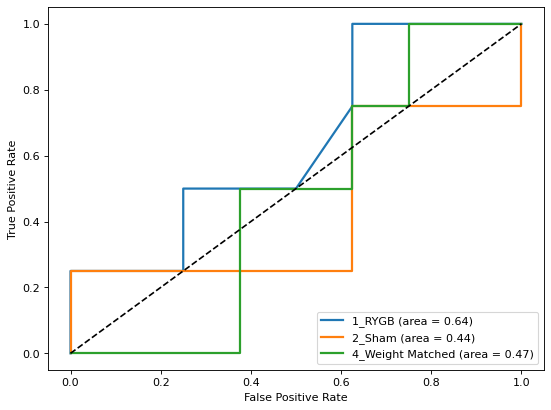

In [22]:
# test_labels
probas_forest = cross_val_predict(forest_clf, test_instances, test_labels, cv = 3, method='predict_proba')
plot_roc_curve(all_classes  = forest_clf.classes_, 
               labels       = test_labels, 
               probas_forest= probas_forest)

Since the quality of classification decrease in comparison to the training set classification, the model is overfitted

# Conclusions

* Classification of groups would be achieved if the number instances is not very limited (i.e., more than 30 rows). While a more comprehensive search of the parameter space by using `GridSearchCV` function migth increase the quality of classification, the sample size still need to be larger in order to avoid overfitting

* One possible solution to increase the number of instances is to use a data augmentation approach.


